# 1. Extract data

In [91]:
import pandas as pd
data=pd.read_csv("C:\\Users\\KIIT\\Desktop\\ML Practice\\Dataset\\Machine Learning A-Z (Codes and Datasets)\\Part 3 - Classification\\Section 14 - Logistic Regression\\Python\\Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2. EDA

In [92]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [94]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# 3. Feature extraction

In [95]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [96]:
print(x)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [97]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


# 4. Model Building

In [98]:
# Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (280, 2)
y_train shape :  (280,)
x_test shape :  (120, 2)
y_test shape :  (120,)


In [99]:
# Train data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# 5. Model evaluation

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,f1_score,r2_score
import numpy as np
test_acc=model.score(x_test,y_test)
train_acc=model.score(x_train,y_train)
print("Training score : ",train_acc)
print("Testing score : ",test_acc)

y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mae : ",mae)
print("mse : ",mse)
print("rmse : ",rmse)

acc_sc=accuracy_score(y_test,y_pred)
print("Accuracy score : ",acc_sc)

f1_sc=f1_score(y_test,y_pred)
r2_sc=r2_score(y_test,y_pred)
print("F1 score : ",f1_sc)
print("R2 score : ",r2_sc)

Training score :  0.6785714285714286
Testing score :  0.5583333333333333
mae :  0.44166666666666665
mse :  0.44166666666666665
rmse :  0.6645800679125629
Accuracy score :  0.5583333333333333
F1 score :  0.0
R2 score :  -0.7910447761194024


# 6. Visualizing Results

c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\KIIT\AppData\Local\Temp\ipykernel_21220\1463027871.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


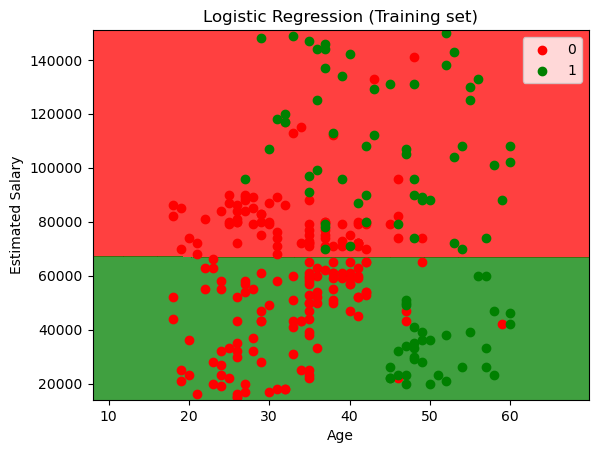

In [101]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
#y_train=sc.fit_transform(y_train)
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()